In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('final_data.csv')
columns_to_drop = ['id', 'displayname', 'rawDescription', 'location', 'username', 'created_at']
data = data.drop(columns_to_drop, axis=1)

# Balancing the data
bots = data[data['account_type'] == 'bot']
not_bot = data[data['account_type'] == 'human'].sample(n=bots.shape[0])
balanced_data = pd.concat([not_bot, bots])

# Splitting the data into features and target
X = balanced_data.drop('account_type', axis=1)
y = balanced_data['account_type']

# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


In [6]:
# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=50, min_samples_leaf=5),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store the accuracy of each model
accuracy_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_valid_scaled)
    accuracy_scores[name] = accuracy_score(y_valid, y_pred)

# Print the accuracy scores
for name, score in accuracy_scores.items():
    print(f'{name}: {score}')


Random Forest: 0.8113207547169812
Logistic Regression: 0.7221269296740995
SVM: 0.7307032590051458
K-Nearest Neighbors: 0.6835334476843911


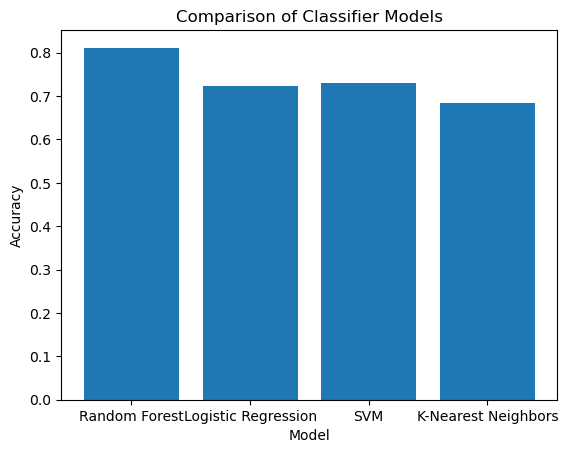

In [7]:
# Create a bar chart to compare the accuracy of each model
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Models')
plt.show()
